In [1]:
# pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_csv(("datasets/bias_detection_in_hiring.csv"))

In [3]:
df.head()

S.No  Age Accessibility        EdLevel  Employment Gender MentalHealth  \
0     0  <35            No         Master           1    Man           No   
1     1  <35            No  Undergraduate           1    Man           No   
2     2  <35            No         Master           1    Man           No   
3     3  <35            No  Undergraduate           1    Man           No   
4     4  >35            No            PhD           0    Man           No   

  MainBranch  YearsCode  YearsCodePro    Country  PreviousSalary  \
0        Dev          7             4     Sweden         51552.0   
1        Dev         12             5      Spain         46482.0   
2        Dev         15             6    Germany         77290.0   
3        Dev          9             6     Canada         46135.0   
4     NotDev         40            30  Singapore        160932.0   

                                      HaveWorkedWith  ComputerSkills  Employed  
0                          C++;Python;Git;PostgreSQL               4         0  
1  Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...              12         1  
2             C;C++;Java;Perl;Ruby;Git;Ruby on Rails               7         0  
3  Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...              13         0  
4                                         C++;Python               2         0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.No            73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [5]:
# Check for missing values and count them for each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

S.No               0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


In [6]:
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [7]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [8]:
# Define a function to segment countries into continents
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others' 

# create a new column 'Continent'
df['Continent'] = df['Country'].apply(segment_country)

In [9]:
df.Continent.unique()

array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

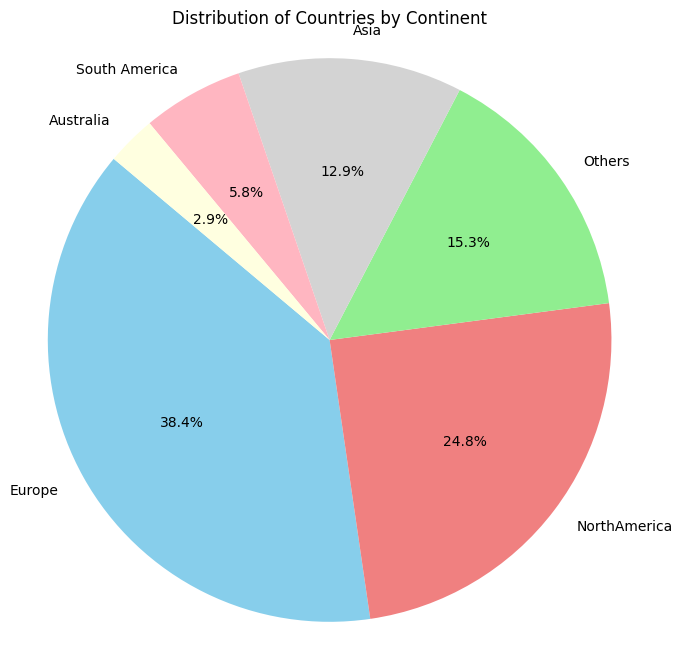

In [10]:
continent_counts = df['Continent'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Distribution of Countries by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

In [11]:
# Drop Country
df.drop(columns = 'Country', inplace=True)
# Similarly remove YearsCodePro column as we have YearsCode column
df.drop(columns = 'YearsCodePro', inplace=True)

In [12]:
df.head()

S.No  Age Accessibility        EdLevel  Employment Gender MentalHealth  \
0     0  <35            No         Master           1    Man           No   
1     1  <35            No  Undergraduate           1    Man           No   
2     2  <35            No         Master           1    Man           No   
3     3  <35            No  Undergraduate           1    Man           No   
4     4  >35            No            PhD           0    Man           No   

  MainBranch  YearsCode  PreviousSalary  ComputerSkills  Employed  \
0        Dev          7         51552.0               4         0   
1        Dev         12         46482.0              12         1   
2        Dev         15         77290.0               7         0   
3        Dev          9         46135.0              13         0   
4     NotDev         40        160932.0               2         0   

      Continent  
0        Europe  
1        Europe  
2        Europe  
3  NorthAmerica  
4          Asia

# **Visualizing the Data Attributes**

In [13]:
# Create a copy of the original dataframe
df_copy = df.copy()

# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Continent']
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df[col])

**Age Distribution**

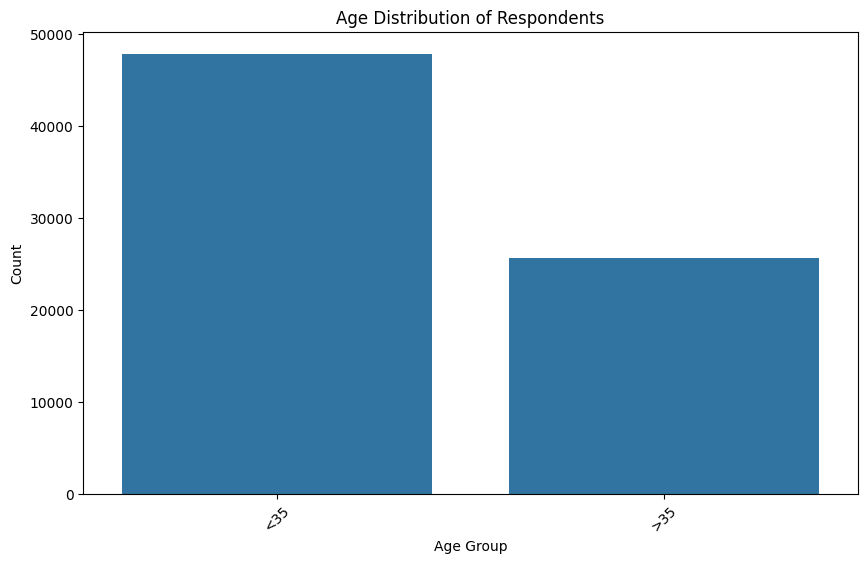

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', order=['<35', '>35'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()

**Distribution of Education Levels**

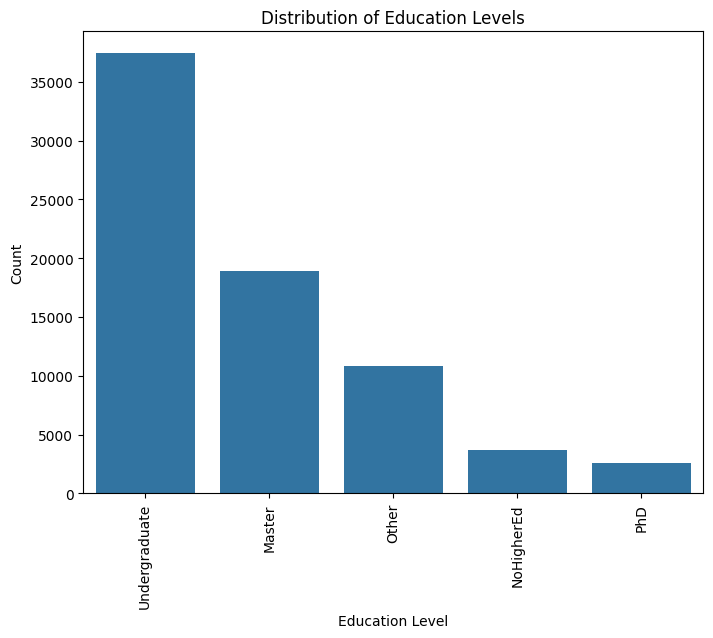

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EdLevel', order=df['EdLevel'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()



**Distribution of Employment Status**

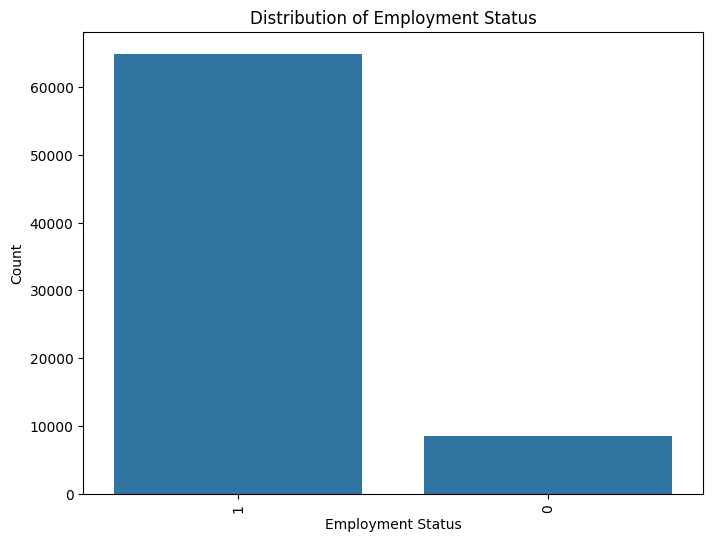

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.show()


**'Relationship Between Age and Employment Status'**

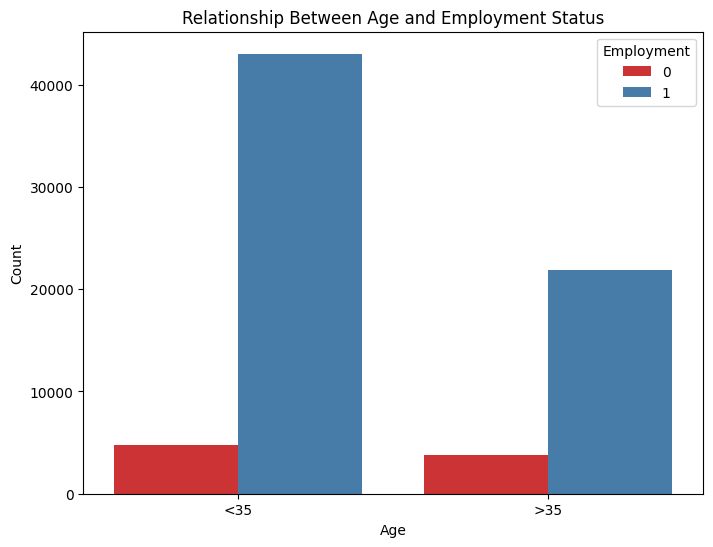

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Employment', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relationship Between Age and Employment Status')
plt.show()

**Distribution of Countries by Continent**

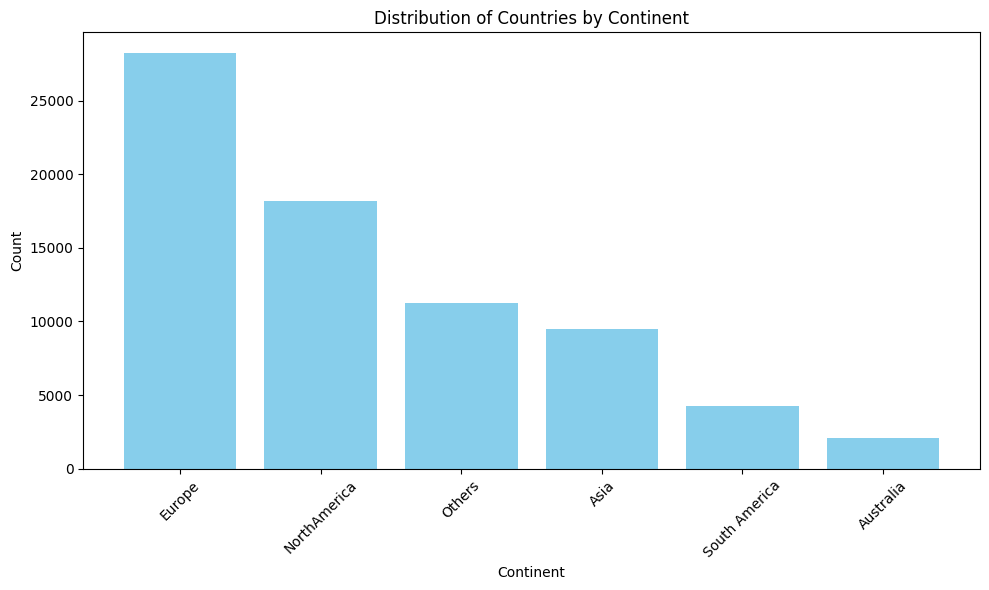

In [18]:
continent_counts = df['Continent'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(continent_counts.index, continent_counts.values, color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Countries by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


**Distribution of Target variable "Employed"**

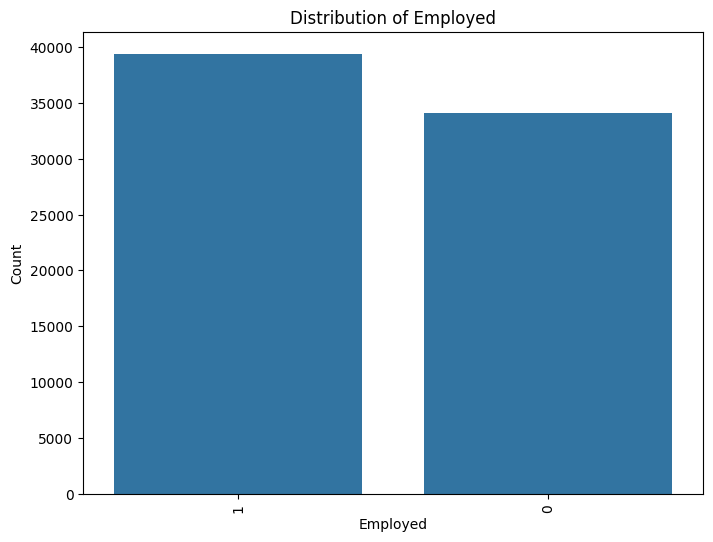

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employed', order=df['Employed'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Distribution of Employed')
plt.show()


**Average Previous Salary by Continent**

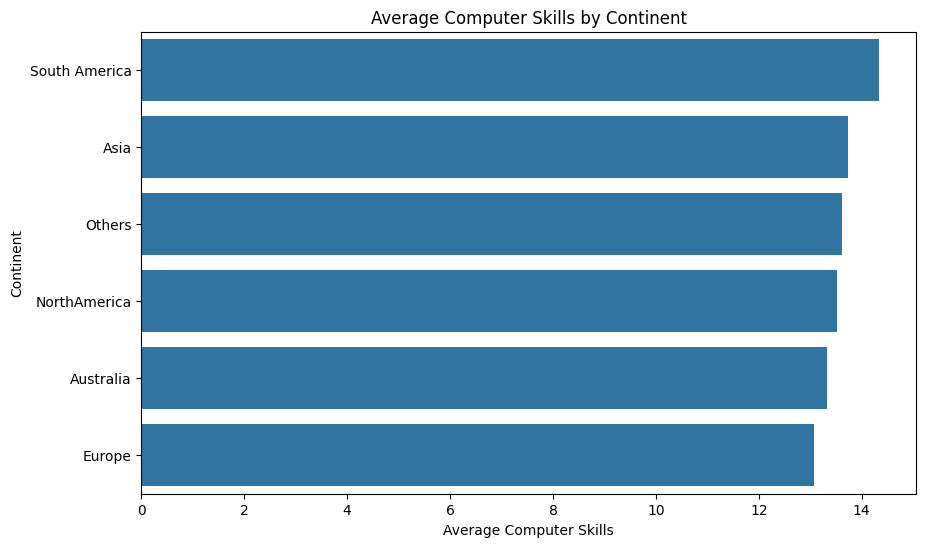

In [20]:
# Group the data by 'Continent' and calculate the average 'ComputerSkills' for each continent
continent_computer_skills = df.groupby('Continent')['ComputerSkills'].mean().reset_index()

# Sort the data by average 'ComputerSkills' in descending order to show the highest skilled continents first
continent_computer_skills = continent_computer_skills.sort_values(by='ComputerSkills', ascending=False)

# Create a bar plot to visualize the average 'ComputerSkills' by continent
# Create a bar plot to visualize the average 'ComputerSkills' by continent
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_computer_skills, x='ComputerSkills', y='Continent')
plt.xlabel('Average Computer Skills')
plt.ylabel('Continent')
plt.title('Average Computer Skills by Continent')
plt.show()


**Continents with Highest Employment Percentage**

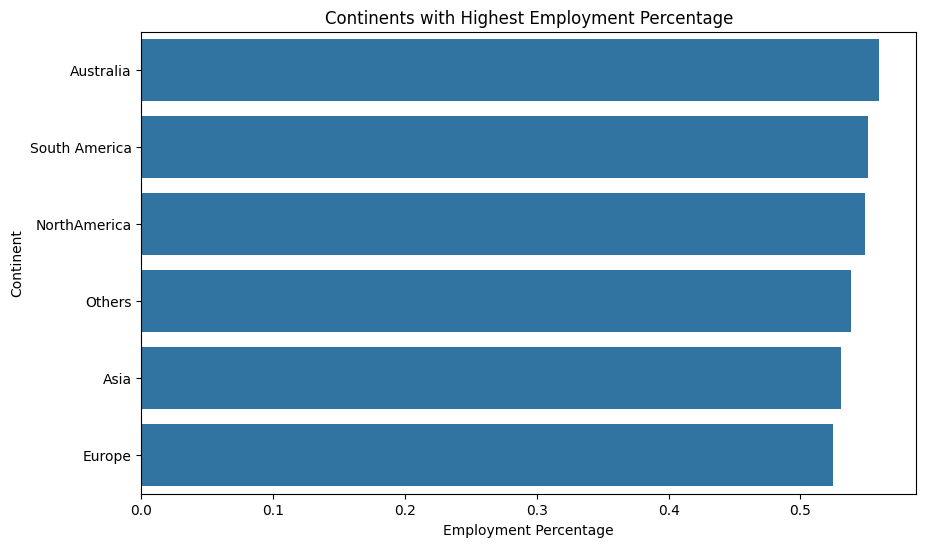

In [21]:
# Calculate the employment percentage for each continent
continent_employment = df.groupby('Continent')['Employed'].mean().reset_index()

# Sort the data by employment percentage in descending order to show the highest percentages first
continent_employment = continent_employment.sort_values(by='Employed', ascending=False)

# Create a bar plot to visualize the employment percentage by continent
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_employment, x='Employed', y='Continent')
plt.xlabel('Employment Percentage')
plt.ylabel('Continent')
plt.title('Continents with Highest Employment Percentage')
plt.show()


# **Check for class imbalance and sampling, Remove outliers**

In [22]:
#Check the Class Variable
df_copy['Employed'].value_counts()

Employed
1    39392
0    34070
Name: count, dtype: int64

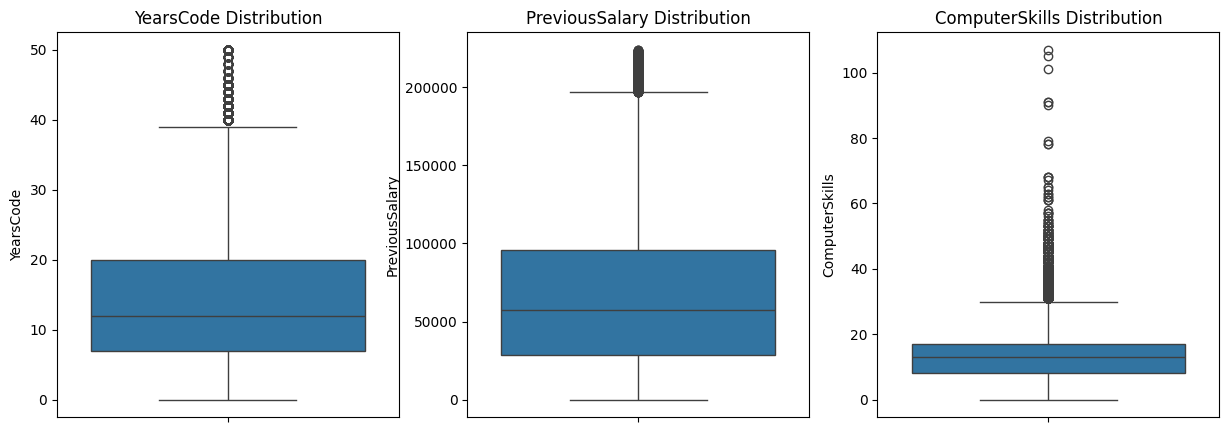

In [23]:
# Plot the distributions of 'YearsCode', 'PreviousSalary,' and 'ComputerSkills'
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.boxplot(data=df_copy, y='YearsCode', orient='vertical')
plt.title('YearsCode Distribution')
plt.subplot(132)
sns.boxplot(data=df_copy, y='PreviousSalary', orient='vertical')
plt.title('PreviousSalary Distribution')
plt.subplot(133)
sns.boxplot(data=df_copy, y='ComputerSkills', orient='vertical')
plt.title('ComputerSkills Distribution')
plt.show()

In [24]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

# Remove outliers in 'YearsCode', 'PreviousSalary,' and 'ComputerSkills'
df_copy = remove_outliers_iqr(df_copy, 'YearsCode')
df_copy = remove_outliers_iqr(df_copy, 'PreviousSalary')
df_copy = remove_outliers_iqr(df_copy, 'ComputerSkills')


In [31]:
df_copy.head()

S.No  Age  Accessibility  EdLevel  Employment  Gender  MentalHealth  \
0     0    0              0        0           1       0             0   
1     1    0              0        4           1       0             0   
2     2    0              0        0           1       0             0   
3     3    0              0        4           1       0             0   
5     5    0              0        0           1       0             0   

   MainBranch  YearsCode  PreviousSalary  ComputerSkills  Employed  Continent  
0           0          7         51552.0               4         0          2  
1           0         12         46482.0              12         1          2  
2           0         15         77290.0               7         0          2  
3           0          9         46135.0              13         0          3  
5           0          9         38915.0               5         0          2

# **Create a train-test split**

In [25]:
# Step 1: Define features and target variable
X = df_copy.drop("Employed", axis=1)  # Features (all columns except 'Employed')
y = df_copy["Employed"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 54576
Testing set size: 13645


# **MODEL FITTING**

# **Logistic Regression**

In [27]:
# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Calculate the AUC
y_scores_lr = logistic_regression.predict_proba(X_train)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)

c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Print the AUC
print(f'Logistic Regression - AUC: {auc_lr:.4f}')

Logistic Regression - AUC: 0.8080


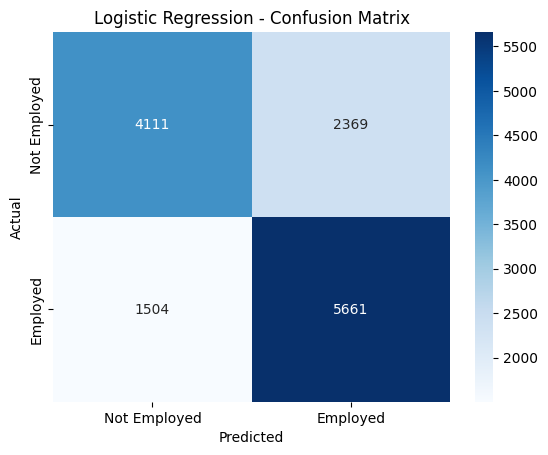

In [29]:
# Plot the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

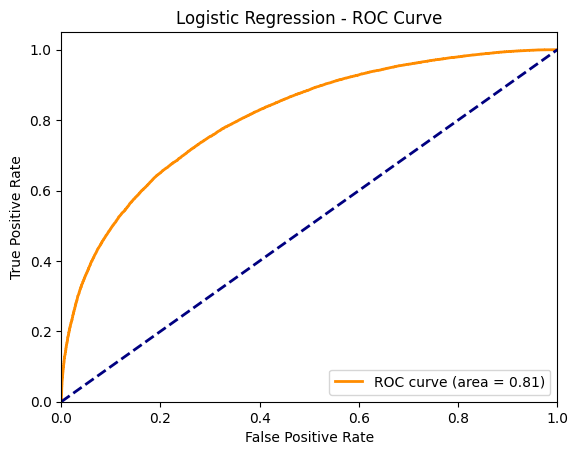

In [30]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
logistic_regression.score(X_test,y_test)

0.7161597654818614

In [32]:
y_pred = logistic_regression.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      6480
           1       0.70      0.79      0.75      7165

    accuracy                           0.72     13645
   macro avg       0.72      0.71      0.71     13645
weighted avg       0.72      0.72      0.71     13645



# Lime

In [34]:
!pip install lime

In [35]:
from lime import lime_tabular

In [36]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Employed', 'Employed'],
    mode='classification'
)

In [37]:
i = 1
exp = explainer.explain_instance(X_test.values[i], logistic_regression.predict_proba, num_features=len(X_train.columns))

c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
exp.show_in_notebook()

In [39]:
X_test.describe()

S.No           Age  Accessibility       EdLevel    Employment  \
count  13645.000000  13645.000000   13645.000000  13645.000000  13645.000000   
mean   36628.978014      0.329351       0.026383      2.495639      0.889630   
std    21116.087037      0.469995       0.160278      1.705119      0.313362   
min        5.000000      0.000000       0.000000      0.000000      0.000000   
25%    18399.000000      0.000000       0.000000      0.000000      1.000000   
50%    36575.000000      0.000000       0.000000      4.000000      1.000000   
75%    54867.000000      1.000000       0.000000      4.000000      1.000000   
max    73456.000000      1.000000       1.000000      4.000000      1.000000   

             Gender  MentalHealth    MainBranch     YearsCode  PreviousSalary  \
count  13645.000000  13645.000000  13645.000000  13645.000000    13645.000000   
mean       0.116013      0.220887      0.076292     13.307072    63526.994064   
std        0.447423      0.414860      0.265474      8.359402    45062.939134   
min        0.000000      0.000000      0.000000      0.000000        1.000000   
25%        0.000000      0.000000      0.000000      7.000000    27492.000000   
50%        0.000000      0.000000      0.000000     11.000000    55000.000000   
75%        0.000000      0.000000      0.000000     18.000000    90000.000000   
max        2.000000      1.000000      1.000000     39.000000   192000.000000   

       ComputerSkills     Continent  
count    13645.000000  13645.000000  
mean        12.864126      2.422646  
std          5.975888      1.346614  
min          0.000000      0.000000  
25%          8.000000      2.000000  
50%         12.000000      2.000000  
75%         17.000000      3.000000  
max         29.000000      5.000000

# Gender Bias Check: In case of inputting same values except gender (0: Male / 1: Female)

## Sample Data1 = Male

In [41]:
sample_data1 = [
    0.329351,  # Age
    0.026383,  # Accessibility
    2.495639,  # EdLevel
    0.886122,  # Employmenta
    0,  # Gender
    0.220887,  # MentalHealth
    0.076292,  # MainBranch
    13.307072, # YearsCode
    1.2, # YearaCodePro
    63526.994064, # PreviousSalary
    12.864126, # ComputerSkills
    2.422646  # Continent
]

sample_data_reshaped = [sample_data1]
prediction = logistic_regression.predict(sample_data_reshaped)
print(prediction)

[1]


c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
sample_data1_array = np.array(sample_data1)

exp = explainer.explain_instance(
    data_row=sample_data1_array, 
    predict_fn=logistic_regression.predict_proba 
)

c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
exp.show_in_notebook()

## Sample Data2 = Female

In [45]:
sample_data2 = [
    0.329351,  # Age
    0.026383,  # Accessibility
    2.495639,  # EdLevel
    0.886122,  # Employmenta
    1,  # Gender
    0.220887,  # MentalHealth
    0.076292,  # MainBranch
    13.307072, # YearsCode
    1.2, # YearsCodePro
    63526.994064, # PreviousSalary
    12.864126, # ComputerSkills
    2.422646  # Continent
]

sample_data_reshaped = [sample_data2]
prediction = logistic_regression.predict(sample_data_reshaped)
print(prediction)

[1]


c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
sample_data2_array = np.array(sample_data2)

exp = explainer.explain_instance(
    data_row=sample_data2_array, 
    predict_fn=logistic_regression.predict_proba
)
exp.show_in_notebook()
print(exp)

# Get probability of employment
# Reshape to a 2D array with a single row
employment_probability = logistic_regression.predict_proba


# Get probability of not being employed
employment_probability = logistic_regression.predict_proba(sample_data2_array.reshape(-1, 1))[0][1]

print(f"Probability of Employment: {employment_probability:.2%}")
print(f"Probability of Non-Employment: {non_employment_probability:.2%}")

c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


c:\Users\Roha\OneDrive\Documents\Neutral\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 12 features as input.